In [11]:
import glob
import time

import matplotlib.pyplot as plt
import numpy as np
from persim import plot_diagrams

In [2]:
from astropology.distance import bottleneck_distance
from astropology.distance import wasserstein_distance
from astropology.signal import pd_signal
from astropology.sdss.filter import filter_noise

In [3]:
# directories
work = "/home/edgar/astropology/"
data = f"{work}/data/spectra/sample_spectra"

In [4]:
f_names = glob.glob(f"{data}/*.npy")
f_names.remove(f"{data}/wave.npy")

In [5]:
n_fluxes = np.load(f_names[0]).size
n_spectra = len(f_names)

spectra = np.empty((n_spectra, n_fluxes))

for idx, file in enumerate(f_names):

    spectra[idx, :] = np.load(file)

wave = np.load(f"{data}/wave.npy")

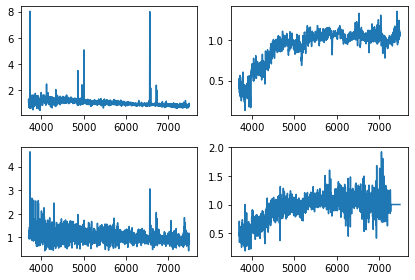

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=2, tight_layout=True)

for idx, ax in enumerate(np.ravel(axs)):

    ax.plot(wave, spectra[idx])

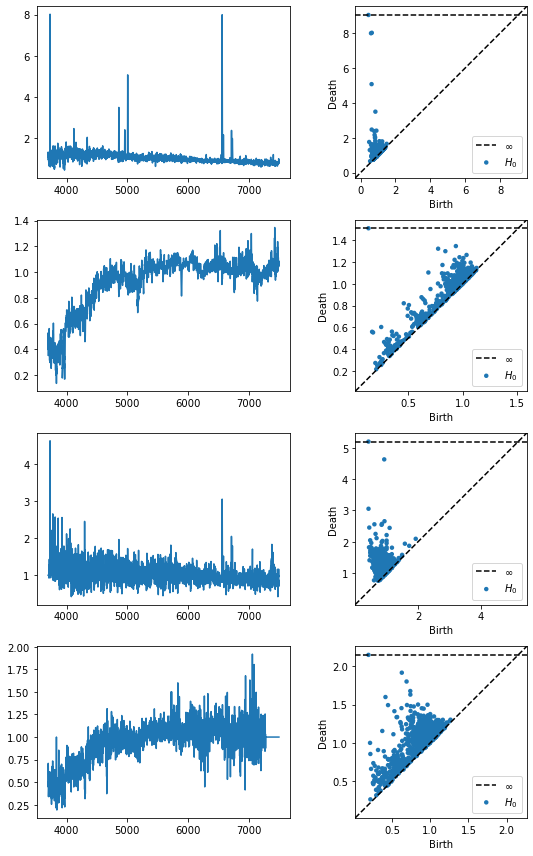

In [7]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(8, 12), tight_layout=True)

for idx, spectrum in enumerate(spectra):
    axs[idx, 0].plot(wave, spectrum)
    pdgm = pd_signal(spectrum)
    plot_diagrams(pdgm, ax=axs[idx, 1])

### What if we filter noise?

Shape of diagrams:
spectrum: (858, 2)
Filtered spectrum: (222, 2)


(0.6390200853347778, 93.46458690040132)

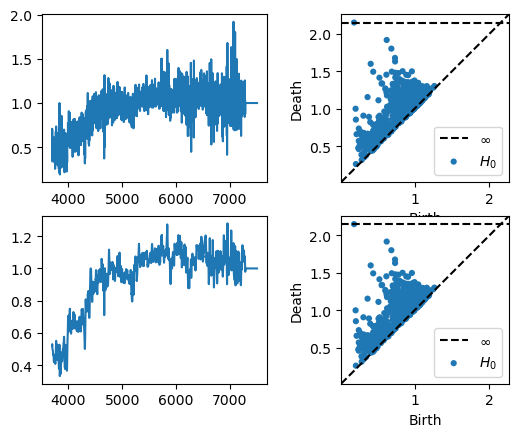

In [10]:
spectrum = spectra[3]
pdgm = pd_signal(spectrum)
f_spectrum, _ = filter_noise(spectrum, kernel_size=3)
f_pdgm = pd_signal(f_spectrum)

print("Shape of diagrams:")
print(f"spectrum: {pdgm.shape}")
print(f"Filtered spectrum: {f_pdgm.shape}")

fig, axs = plt.subplots(nrows=2, ncols=2)

axs[0, 0].plot(wave, spectrum)
plot_diagrams(pdgm, ax=axs[0, 1])

axs[1, 0].plot(wave, f_spectrum)
plot_diagrams(pdgm, ax=axs[1, 1])

bd = bottleneck_distance(pdgm, f_pdgm)
wd = wasserstein_distance(pdgm, f_pdgm)
bd, wd

Explore time complexity of distances

In [14]:
pdgm_i = pd_signal(spectra[0])
pdgm_j = pd_signal(spectra[1])


In [17]:
%%timeit
_ = wasserstein_distance(pdgm_i, pdgm_j)

1.09 s ± 30.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit
_ = bottleneck_distance(pdgm_i, pdgm_j)

24.1 s ± 596 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
percentages = np.arange(10, 110, 10)
# percentages
w_time = np.empty(percentages.size)
b_time = np.empty(percentages.size)

for idx, percentage in enumerate(percentages):
    
    n_fluxes = percentage * spectra.shape[1] // 100
    pdgm_i = pd_signal(spectra[0, :n_fluxes])
    pdgm_j = pd_signal(spectra[1, :n_fluxes])

    w_start_time = time.perf_counter()
    _ = wasserstein_distance(pdgm_i, pdgm_j)
    w_finish_time = time.perf_counter()
    w_time[idx] = w_finish_time - w_start_time

    b_start_time = time.perf_counter()
    _ = bottleneck_distance(pdgm_i, pdgm_j)
    b_finish_time = time.perf_counter()
    b_time[idx] = b_finish_time - b_start_time

    

Text(0, 0.5, 'Running time [s]')

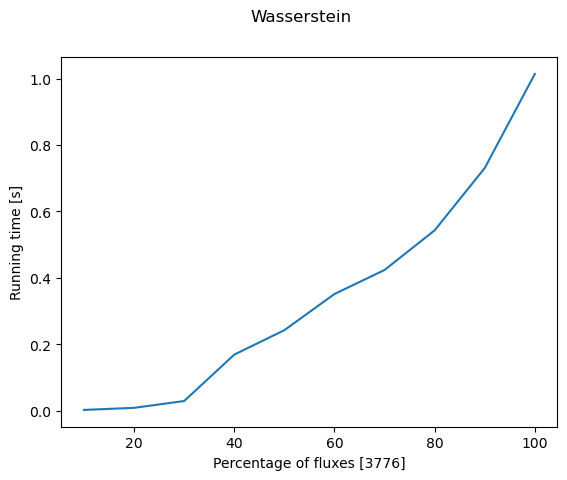

In [24]:
plt.plot(percentages, w_time)
plt.suptitle("Wasserstein")
plt.xlabel(f"Percentage of fluxes [{spectra.shape[1]}]")
plt.ylabel("Running time [s]")

Text(0, 0.5, 'Running time [s]')

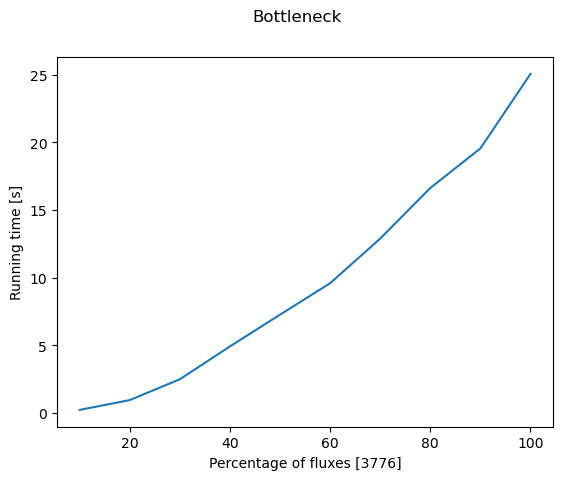

In [25]:
plt.plot(percentages, b_time)
plt.suptitle("Bottleneck")
plt.xlabel(f"Percentage of fluxes [{spectra.shape[1]}]")
plt.ylabel("Running time [s]")